DBSCAN

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [61]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import seaborn as sns
from scipy.spatial.distance import pdist, squareform

In [62]:
from sklearn.metrics import *
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph

In [63]:
from kneed import KneeLocator

In [64]:
# import dataset (uso il dataset con i missing value trattati)
df = pd.read_csv("/home/ubuntu/Università/LM/Data mining/trainm.csv", skipinitialspace=True)
# rimuovo le variabili categoriche
dfk = df.drop(['name', 'artists', 'album_name', 'genre'], axis=1)
# rimuovo le variabili binary ed ordinal
dfk.drop(['explicit', 'mode', 'key', 'time_signature'], axis=1, inplace=True)
dfk.head()

,duration_ms,popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,features_duration_ms,n_beats,n_bars,processing
0,241760,46,0.690,0.513,-12.529,0.0975,0.302000,0.53600,0.281,0.6350,142.221,241760,567.0,141.0,1.279305
1,444000,0,0.069,0.196,-24.801,0.0805,0.283000,0.93400,0.360,0.0336,75.596,444000,617.0,155.0,2.367412
2,333506,3,0.363,0.854,-7.445,0.0397,0.000089,0.80000,0.262,0.4890,116.628,333507,652.0,162.0,3.700483
3,269800,23,0.523,0.585,-5.607,0.0765,0.066400,0.00127,0.117,0.3850,140.880,269800,619.0,155.0,1.279305
4,307651,25,0.643,0.687,-11.340,0.0539,0.000576,0.09690,0.299,0.6370,143.956,307652,733.0,183.0,4.067086


In [65]:
# Specifica il percorso completo del file
file_path = '/home/ubuntu/Università/LM/Data mining/traink.csv'

# Salva il DataFrame nel file CSV
dfk.to_csv(file_path, index=False)

In [66]:
scaler = MinMaxScaler()
data = scaler.fit_transform(dfk)

In [67]:
dist = pdist(data, 'euclidean')
dist = squareform(dist)
print(dist)

[[0.         1.23700547 1.08642078 ... 0.83536955 0.90915344 0.67951676]
 [1.23700547 0.         1.07221536 ... 1.09256181 1.55352895 1.56061492]
 [1.08642078 1.07221536 0.         ... 0.92934024 1.20780443 1.38497324]
 ...
 [0.83536955 1.09256181 0.92934024 ... 0.         1.14936138 1.28814873]
 [0.90915344 1.55352895 1.20780443 ... 1.14936138 0.         0.96776185]
 [0.67951676 1.56061492 1.38497324 ... 1.28814873 0.96776185 0.        ]]


In [68]:
k=4
kth_distances = []

for d in dist:  # dist è una mtrice, d è l'array riga della matrice (d=prima riga, poi d=seconda riga, ecc...)
    index_kth_distance = np.argsort(d)[k]  # np.argsort(d) ordina gli elementi della riga d e gli attribuisce degli indici in ordine crescente, e prende il k-esimo indice
    kth_distances.append(d[index_kth_distance])  # prende l'elemento di di che ha l'indice ricavato sopra

# kth_distances = [] è un array che contiene le distanze di tuttii punti dal loro th neighbor

Coordinate del ginocchio: (14825, 0.512521620490759)


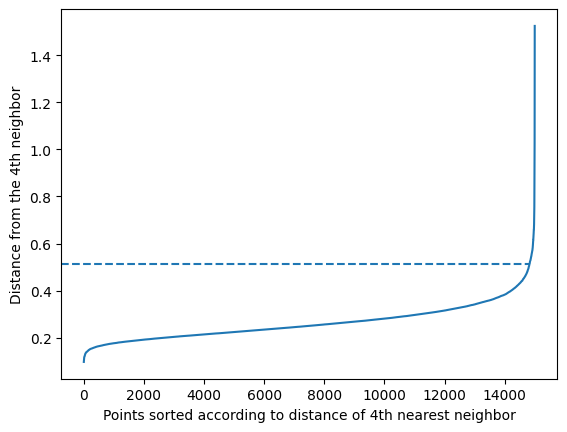

In [69]:
x = range(0, len(kth_distances))
y = sorted(kth_distances)
kn = KneeLocator(x, y, curve='convex', direction='increasing')
plt.plot(x, y)
plt.ylabel('Distance from the {}th neighbor'.format(k))
plt.xlabel('Points sorted according to distance of {}th nearest neighbor'.format(k))
knee_x = kn.knee
knee_y = y[kn.knee]
plt.axhline(knee_y, linestyle='dashed', xmax=(knee_x - plt.xlim()[0]) / (plt.xlim()[1] - plt.xlim()[0]))
print(f"Coordinate del ginocchio: ({knee_x}, {knee_y})")
plt.show()

Coordinate del ginocchio: (14825, 0.512521620490759)
Coordinate del ginocchio: (14935, 0.6443819224544752)
Coordinate del ginocchio: (14845, 0.6255991540468854)
Coordinate del ginocchio: (14740, 0.6444295503287624)
Coordinate del ginocchio: (14817, 0.751395576803537)


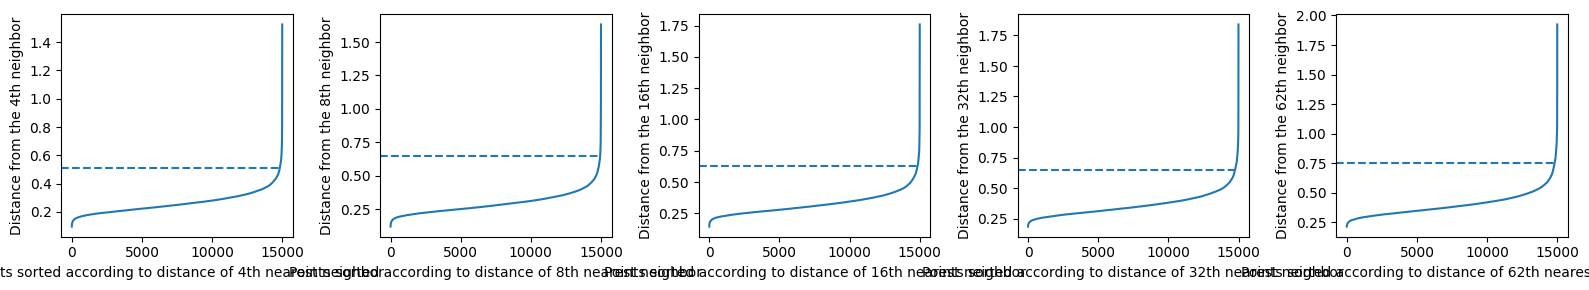

In [70]:
ks = [4, 8, 16, 32, 62]

fig = plt.figure(figsize=(16, 3)) # dimensions of the overall plot
fig_dims = (1, len(ks))

for i in range(len(ks)):
    k = ks[i]
    kth_distances = []

    for d in dist:  # d is a vector containing distances between the ith record and all the others
        index_kth_distance = np.argsort(d)[k]  # take the index of the kth nearest neighbor
        kth_distances.append(d[index_kth_distance])  # store the distance in a list

    plt.subplot2grid(fig_dims, (0, i))
    x = range(0, len(kth_distances))
    y = sorted(kth_distances)
    kn = KneeLocator(x, y, curve='convex', direction='increasing')
    plt.plot(x, y)
    knee_x = kn.knee
    knee_y = y[kn.knee]
    plt.axhline(knee_y, linestyle='dashed', xmax=(knee_x - plt.xlim()[0]) / (plt.xlim()[1] - plt.xlim()[0]))
    print(f"Coordinate del ginocchio: ({knee_x}, {knee_y})")
    plt.ylabel('Distance from the {}th neighbor'.format(k))
    plt.xlabel('Points sorted according to distance of {}th nearest neighbor'.format(k))
             
plt.tight_layout()
plt.show()

Coordinate del ginocchio: (14740, 0.6444295503287624)


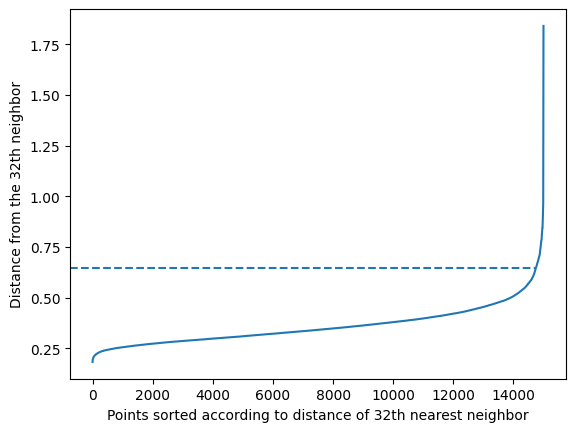

In [71]:
k=32
kth_distances = []

for d in dist:  # dist è una mtrice, d è l'array riga della matrice (d=prima riga, poi d=seconda riga, ecc...)
    index_kth_distance = np.argsort(d)[k]  # np.argsort(d) ordina gli elementi della riga d e gli attribuisce degli indici in ordine crescente, e prende il k-esimo indice
    kth_distances.append(d[index_kth_distance])  # prende l'elemento di di che ha l'indice ricavato sopra

# kth_distances = [] è un array che contiene le distanze di tuttii punti dal loro th neighbor

x = range(0, len(kth_distances))
y = sorted(kth_distances)
kn = KneeLocator(x, y, curve='convex', direction='increasing')
plt.plot(x, y)
plt.ylabel('Distance from the {}th neighbor'.format(k))
plt.xlabel('Points sorted according to distance of {}th nearest neighbor'.format(k))
knee_x = kn.knee
knee_y = y[kn.knee]
plt.axhline(knee_y, linestyle='dashed', xmax=(knee_x - plt.xlim()[0]) / (plt.xlim()[1] - plt.xlim()[0]))
print(f"Coordinate del ginocchio: ({knee_x}, {knee_y})")
plt.show()

In [72]:
# sembrerebbe una buona regola scegliere MinPts più grandi della dimensionalità del dataset (15) 2*dim (o ancora di più se il dataset è grande e con noise)
# e prendere eps nel ginocchio (pt. di massima pendenza), ma mi tocca prenderlo più piccolo perchè sennò mi dà errore

In [73]:
# label = -1 è il rumore
# 0.33 32
dbscan = DBSCAN(eps=0.33, min_samples=32, metric='euclidean')
dbscan.fit(data)

hist, bins = np.histogram(dbscan.labels_, bins=range(-1, len(set(dbscan.labels_)) + 1))
print('labels', dict(zip(bins, hist)))
print('silhouette', silhouette_score(data[dbscan.labels_ != -1], dbscan.labels_[dbscan.labels_ != -1]))

labels {-1: 3528, 0: 10602, 1: 870, 2: 0}
silhouette 0.3497671451872409


In [74]:
min_vals = np.min(dfk, axis=0)
max_vals = np.max(dfk, axis=0)
dfkn = (dfk - min_vals) / (max_vals - min_vals)
dfkn['label'] = dbscan.labels_
dfkn.head()

,duration_ms,popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,features_duration_ms,n_beats,n_bars,processing,label
0,0.056710,0.489362,0.704082,0.513,0.702298,0.103834,0.303213,0.53600,0.282696,0.638191,0.644920,0.056710,0.077164,0.064977,0.160046,-1
1,0.105897,0.000000,0.070408,0.196,0.469376,0.085729,0.284137,0.93400,0.362173,0.033769,0.342800,0.105897,0.083968,0.071429,0.487891,-1
2,0.079024,0.031915,0.370408,0.854,0.798793,0.042279,0.000090,0.80000,0.263581,0.491457,0.528865,0.079024,0.088732,0.074654,0.889543,0
3,0.063530,0.244681,0.533673,0.585,0.833678,0.081470,0.066667,0.00127,0.117706,0.386935,0.638839,0.063530,0.084241,0.071429,0.160046,0
4,0.072736,0.265957,0.656122,0.687,0.724866,0.057401,0.000578,0.09690,0.300805,0.640201,0.652788,0.072736,0.099755,0.084332,1.000000,0


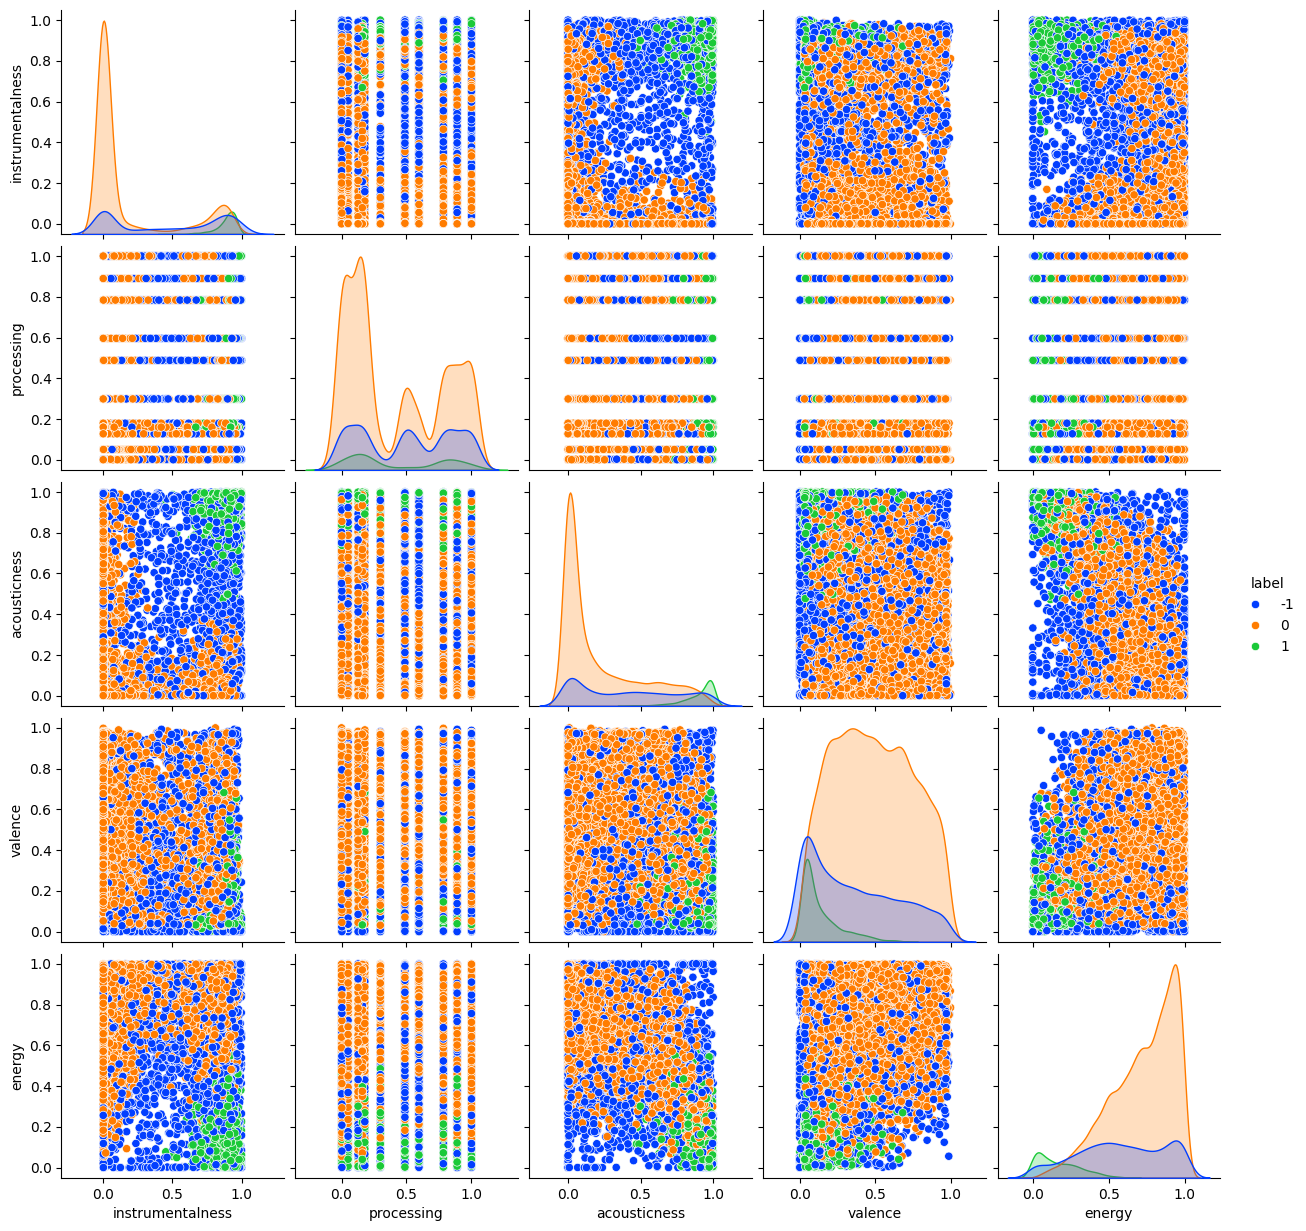

In [75]:
sns.pairplot(dfkn[['instrumentalness', 'processing', 'acousticness', 'valence', 'energy', 'label']], hue='label', diag_kind='kde', palette='bright')    # colorblind
plt.show()

In [76]:
# Specifica il percorso completo del file
file_path = '/home/ubuntu/Università/LM/Data mining/traindb.csv'

# Salva il DataFrame nel file CSV
dfkn.to_csv(file_path, index=False)